<a href="https://colab.research.google.com/github/MarcosVel/Machine-Learning-and-Neurons/blob/master/RegressionPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-03-12 20:15:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-03-12 20:15:11 (25.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [4]:
data = pd.read_csv('moore.csv', header=None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [5]:
# making and N x D matrix
X = data[:, 0].reshape(-1, 1)
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [6]:
Y = data[:, 1]
Y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

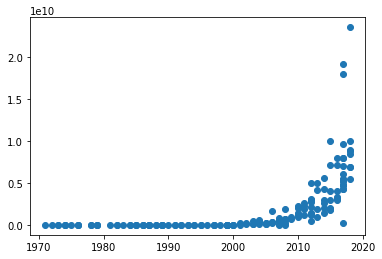

In [7]:
plt.scatter(X, Y)

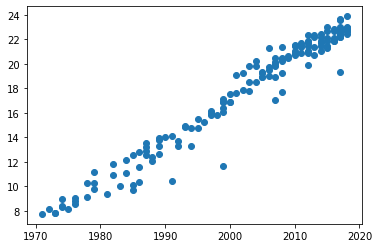

In [8]:
# log to cancel the exponencial
Y = np.log(Y)
# plot linear regression
plt.scatter(X, Y);

- o eixo X de 1970 à 2020 bagunçará o modelo de machine learning

In [9]:
X = X - X.mean()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

In [12]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [13]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 2s 7ms/step - loss: 379.9311 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 377.9987 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 260.0491 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 206.5581 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 147.1395 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 148.6153 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 100.1008 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 73.5497 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 81.3646 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 58.9245 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss

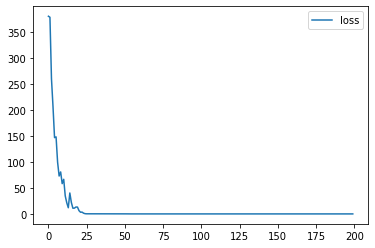

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [15]:
model.layers

In [16]:
model.layers[0].get_weights()

[array([[0.34639052]], dtype=float32), array([17.74495], dtype=float32)]

In [17]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.34639052

In [18]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0010570423026817


# Making Predictions

In [30]:
Yhat = model.predict(X).flatten()
Yhat

6/6 [==============================] - 0s 3ms/step


array([ 6.9384203,  7.284811 ,  7.6312017,  7.6312017,  7.9775925,
        7.9775925,  7.9775925,  8.323982 ,  8.670373 ,  8.670373 ,
        8.670373 ,  9.363154 ,  9.363154 ,  9.709545 ,  9.709545 ,
        9.709545 , 10.402326 , 10.748716 , 10.748716 , 11.095106 ,
       11.441498 , 11.441498 , 11.787888 , 11.787888 , 11.787888 ,
       12.134278 , 12.134278 , 12.134278 , 12.480669 , 12.480669 ,
       12.480669 , 12.480669 , 12.827059 , 12.827059 , 13.17345  ,
       13.17345  , 13.17345  , 13.17345  , 13.51984  , 13.866231 ,
       13.866231 , 14.212622 , 14.212622 , 14.559011 , 14.559011 ,
       14.905402 , 14.905402 , 15.251793 , 16.637356 , 15.251793 ,
       15.598184 , 15.944574 , 15.944574 , 15.944574 , 16.290964 ,
       16.637356 , 16.637356 , 16.983746 , 16.983746 , 16.637356 ,
       16.637356 , 16.637356 , 16.983746 , 17.330135 , 17.330135 ,
       17.676527 , 18.369308 , 18.369308 , 18.715698 , 19.062088 ,
       18.715698 , 19.062088 , 19.40848  , 19.75487  , 18.0229

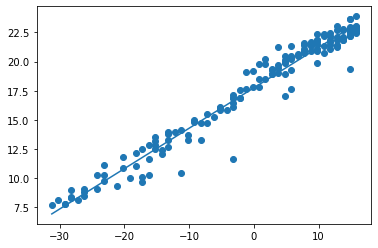

In [28]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [26]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + 1 -> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True